In [3]:
import pandas as pd
import quandl as qd
import numpy as np
import multiprocessing as mp
%matplotlib inline
qd.ApiConfig.api_key = ""

In [11]:
# qd.get("WIKI/AAPL").loc['2005-1-31':,'Adj. Close'].groupby(pd.Grouper(level=0, freq='M')).last().plot()
# qd.get("WIKI/AAPL").loc['2005-1-31':,'Adj. Close'].groupby(pd.Grouper(level=0, freq='M')).last().rolling(3).mean().plot()
# qd.get("WIKI/GS").loc['2005-1-31':,'Adj. Close'].groupby(pd.Grouper(level=0, freq='M')).last().plot()
# qd.get("WIKI/GS").loc['2005-1-31':,'Adj. Close'].groupby(pd.Grouper(level=0, freq='M')).last().rolling(3).mean().plot()

In [36]:
sp500const = pd.read_csv('sp500_constituents.csv')

In [13]:
# def get_data_from_quandl(ticker, target):
#     res = qd.get("WIKI/{}".format(ticker))
#     target[ticker] = res
#     print(ticker)

In [2]:
# res = {}
# for i, ticker in enumerate(sp500const.Symbol):
#     try:
#         res[ticker] = qd.get("WIKI/{}".format(ticker))
#         print(i, ticker)
#     except:
#         print(i, ticker, 'NaNa')
# pn = pd.Panel.from_dict(res)
# pn.to_pickle('stock_price_history.pkl')

In [6]:
pn = pd.read_pickle('stock_price_history.pkl')

In [7]:
adjclose = pn.loc[:, :, 'Adj. Close']

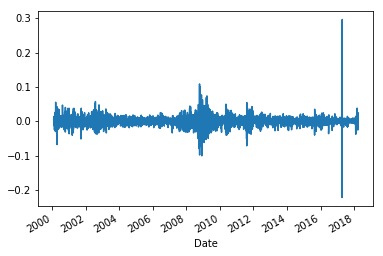

In [26]:
ax = adjclose.loc['2000-1-31':,:].mean(axis=1).pct_change().plot()

In [68]:
gspc = pd.read_csv('^GSPC.csv')
gspc.Date = pd.to_datetime(gspc.Date)
gspc = gspc.set_index('Date')
gspc = gspc.loc['2000-1-31':,'Adj Close']
gspc.head()

Date
2000-01-31    1394.459961
2000-02-01    1409.280029
2000-02-02    1409.119995
2000-02-03    1424.969971
2000-02-04    1424.369995
Name: Adj Close, dtype: float64

In [69]:
adjclose.loc['2000-1-31':,:].head(3)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,45.157511,NaN,NaN,3.333330,NaN,3.775973,29.250,9.416354,NaN,13.670607,...,8.581090,34.156147,26.304621,7.484133,64.118249,NaN,3.773156,NaN,46.927728,NaN
2000-02-01,48.439089,NaN,NaN,3.220881,NaN,3.892606,28.750,9.508898,NaN,13.874202,...,8.581090,35.791162,26.403010,7.559730,63.903293,NaN,4.052551,NaN,47.419783,NaN
2000-02-02,52.191412,NaN,NaN,3.174616,NaN,3.932177,28.125,9.560954,NaN,15.222393,...,8.496393,37.889059,26.599786,7.804665,64.302497,NaN,3.814011,NaN,46.530910,NaN


In [56]:
weights = sp500const[['Symbol', 'Weight']].set_index('Symbol')['Weight']
weights.head()

Symbol
MSFT     3.748212
AAPL     3.472323
AMZN     2.941902
FB       1.764735
BRK.B    1.681888
Name: Weight, dtype: float64

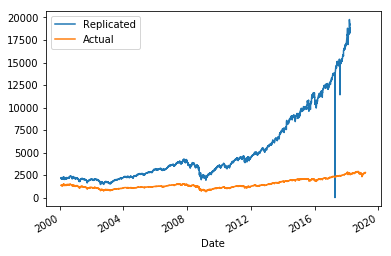

In [74]:
adjclose.loc['2000-1-31':,:].multiply(weights).sum(axis=1).plot(label='Replicated', legend=True)
gspc.plot(label='Actual', legend=True)